<a href="https://colab.research.google.com/github/ArifAygun/Sentiment-Analysis-SMRT/blob/main/SMRT_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SENTIMENT ANALYSIS OF SMRT SYSYTEMS**
# **IN CAPTERRA WEBSITE REWIEVS**



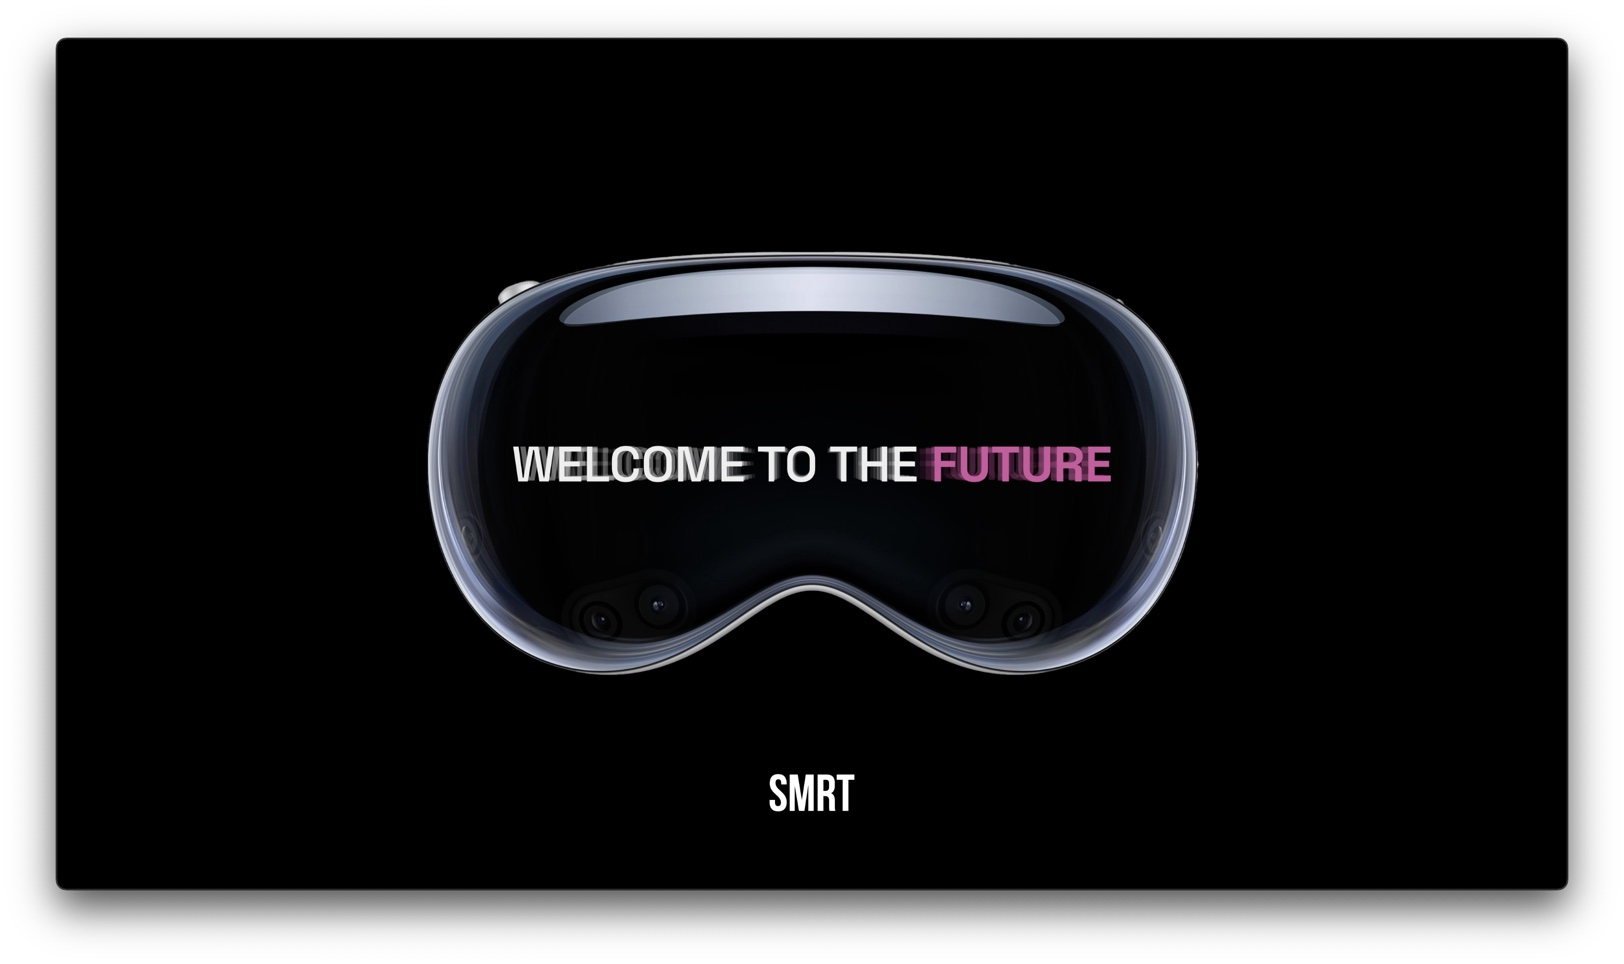

https://www.capterra.com/p/175015/SMRT-POS/reviews/

#### IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import nltk

from collections import Counter
from nltk.corpus import stopwords
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/SMRT/

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Mounted at /content/drive/
/content/drive/My Drive/SMRT


In [2]:
reviews= pd.read_excel('Capterra_SMRT_Final.xlsx', 'Final')

### DATA PREPROCESSING

In [3]:
reviews.head().transpose()

,0,1,2,3,4
Date,2019-08-20 00:00:00,2020-06-18 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00
User Name,Joshua V.,Daniel C.,Kyle M.,Jason Y.,Amy W.
User Position,Ceo,Owner,Director of Operations,Vice President,Manager
Department,Consumer Services,Consumer Services,Consumer Services,Retail,Consumer Services
Employees,1-10,11-50,11-50,51-200,11-50
Use Period,Less than 6 months,2+ years,1-2 years,2+ years,2+ years
Overall Rating,5,5,5,5,5
Ease of Use,5,5,5,5,4
Customer Service,5,5,5,5,5
Features,5,5,5,5,4


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     115 non-null    datetime64[ns]
 1   User Name                115 non-null    object        
 2   User Position            113 non-null    object        
 3   Department               115 non-null    object        
 4   Employees                115 non-null    object        
 5   Use Period               115 non-null    object        
 6   Overall Rating           115 non-null    int64         
 7   Ease of Use              115 non-null    int64         
 8   Customer Service         115 non-null    int64         
 9   Features                 115 non-null    int64         
 10  Value for Money          110 non-null    float64       
 11  Likelihood to Recommend  115 non-null    int64         
 12  Headline                 115 non-nul

**Drop 'User Name' (Unnecessary), 'Vendor Response' (Only 4/115 Data Point) Columns**

In [5]:
reviews = reviews.drop(['User Name', 'Vendor Response'], axis=1)

#### MISSING & UNIQUE VALUES

**Missing Values**

In [6]:
missing_values = reviews.isna().sum()

print(missing_values)

Date                        0
User Position               2
Department                  0
Employees                   0
Use Period                  0
Overall Rating              0
Ease of Use                 0
Customer Service            0
Features                    0
Value for Money             5
Likelihood to Recommend     0
Headline                    0
Overall Rev                21
Pros                        0
Cons                        0
Alternative Considered     95
Reasons for Choosing       62
Switched From              68
Reasons for Switching      35
dtype: int64


**Filling Missing Values**

In [7]:
# Fill missing values in 'User Position' with "Verified Reviewer"
reviews['User Position'].fillna('Verified Reviewer', inplace=True)

# Fill missing values in 'Value for Money' with the mean of the column
mean_value_for_money = reviews['Value for Money'].mean()
reviews['Value for Money'].fillna(mean_value_for_money, inplace=True)

#Convert dtype of "Value for Money"
reviews['Value for Money'] = reviews['Value for Money'].astype(int)

missing_values = reviews.isna().sum()
print(missing_values)

Date                        0
User Position               0
Department                  0
Employees                   0
Use Period                  0
Overall Rating              0
Ease of Use                 0
Customer Service            0
Features                    0
Value for Money             0
Likelihood to Recommend     0
Headline                    0
Overall Rev                21
Pros                        0
Cons                        0
Alternative Considered     95
Reasons for Choosing       62
Switched From              68
Reasons for Switching      35
dtype: int64


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     115 non-null    datetime64[ns]
 1   User Position            115 non-null    object        
 2   Department               115 non-null    object        
 3   Employees                115 non-null    object        
 4   Use Period               115 non-null    object        
 5   Overall Rating           115 non-null    int64         
 6   Ease of Use              115 non-null    int64         
 7   Customer Service         115 non-null    int64         
 8   Features                 115 non-null    int64         
 9   Value for Money          115 non-null    int64         
 10  Likelihood to Recommend  115 non-null    int64         
 11  Headline                 115 non-null    object        
 12  Overall Rev              94 non-null

**Unique Values**

In [9]:
unique_value_counts = reviews.nunique()

print(unique_value_counts)

Date                        80
User Position               23
Department                   8
Employees                    4
Use Period                   4
Overall Rating               3
Ease of Use                  5
Customer Service             5
Features                     4
Value for Money              3
Likelihood to Recommend      6
Headline                   112
Overall Rev                 94
Pros                       115
Cons                       115
Alternative Considered      12
Reasons for Choosing        53
Switched From               14
Reasons for Switching       80
dtype: int64


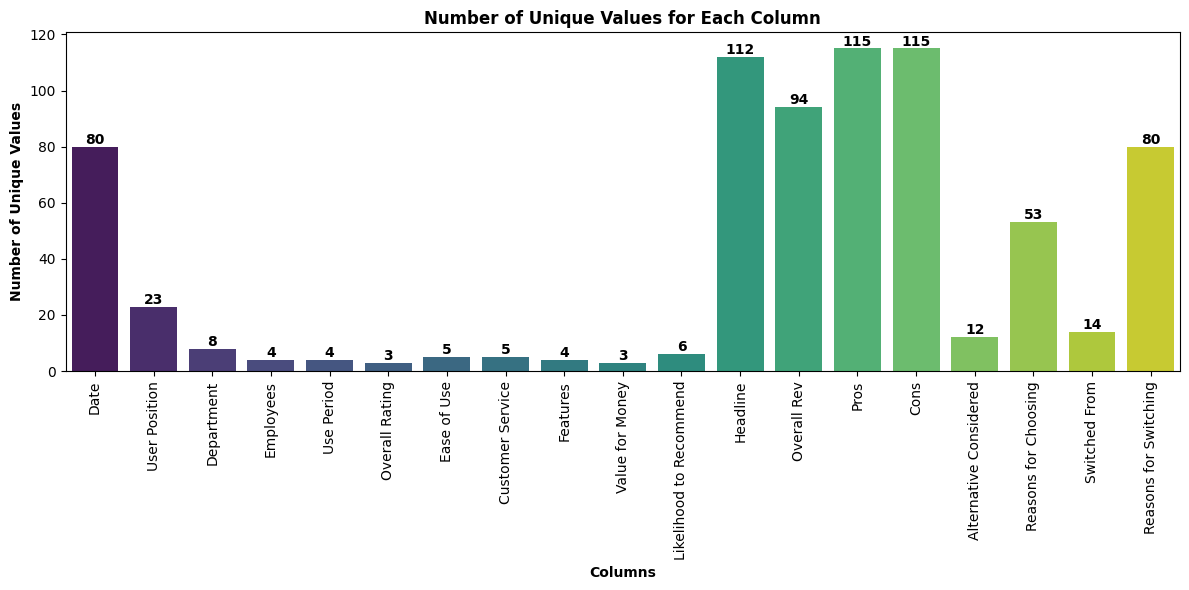

In [10]:
unique_value_counts = reviews.nunique()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=unique_value_counts.index, y=unique_value_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Columns', weight='bold')
plt.ylabel('Number of Unique Values', weight='bold')
plt.title('Number of Unique Values for Each Column', weight='bold')
plt.tight_layout()


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', weight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.show()

1. **Date (80 Unique Values):** The "Date" column shows that there are 80 different dates on which the reviews were posted. This indicates that reviews are distributed over time, suggesting ongoing user engagement with the product.

2. **User Position (23 Unique Values):** With 23 unique values in the "User Position" column, it's clear that a diverse group of users from various job positions has reviewed the product. This diversity can provide insights from multiple perspectives.

3. **Department (8 Unique Values):** The "Department" column has 8 unique values, signifying that users from different departments within organizations have provided reviews. This implies that the product is used across various functional areas.

4. **Employees (4 Unique Values):** With 4 unique values in the "Employees" column, it appears that users from organizations of different sizes have reviewed the product. This diversity in organization size can influence their feedback.

5. **Use Period (4 Unique Values):** The "Use Period" column indicates that users have different durations of experience with the product, with 4 unique values. This suggests varying levels of familiarity with the product.

6. **Overall Rating (3 Unique Values):** The "Overall Rating" column has 3 unique values, indicating that reviewers have provided ratings on a scale with 3 distinct levels. This can help identify overall user satisfaction levels.

7. **Ease of Use (5 Unique Values):** Users have provided ratings related to the ease of using the product, with 5 unique values. This reflects differing opinions on the product's user-friendliness.

8. **Customer Service (5 Unique Values):** The "Customer Service" column has 5 unique values, suggesting varying assessments of the quality of customer support provided by the company.

9. **Features (4 Unique Values):** With 4 unique values in the "Features" column, users have expressed different opinions regarding the product's features and functionalities.

10. **Value for Money (3 Unique Values):** Users have different perspectives on the product's value for money, as indicated by 3 unique values.

11. **Likelihood to Recommend (6 Unique Values):** The "Likelihood to Recommend" column contains 6 unique values, representing a wide range of users' intentions to recommend the product to others.

12. **Headline (112 Unique Values):** In the "Headline" column, there are 112 unique values, suggesting that users have provided a variety of short summaries or headlines for their reviews.

13. **Overall Rev (94 Unique Values):** The "Overall Rev" column has 94 unique values, indicating a diversity of detailed reviews or feedback provided by users.

14. **Pros (115 Unique Values):** Similarly, the "Pros" column contains 115 unique values, representing various positive aspects or strengths of the product as mentioned by reviewers.

15. **Cons (115 Unique Values):** There are 115 unique values in the "Cons" column, suggesting a wide array of criticisms or weaknesses mentioned by users.

16. **Alternative Considered (12 Unique Values):** Users considered various alternatives before choosing the reviewed product, as shown by the 12 unique values in this column.

17. **Reasons for Choosing (53 Unique Values):** The "Reasons for Choosing" column contains 53 unique values, indicating the diversity of reasons users selected the product over alternatives.

18. **Switched From (14 Unique Values):** Users switched from different products or services before using the reviewed product, as suggested by the 14 unique values in this column.

The dataset provides a rich and diverse set of user feedback and opinions about the product. The variety of unique values across different columns demonstrates the wide range of experiences, preferences, and perspectives of the user base. This diversity can serve as a valuable resource for gaining insights into product performance, identifying areas for improvement, and tailoring marketing and customer support strategies to meet the needs of different user segments.

### PERSONAL INFORMATIONS

##### USER POSITION

In [11]:
# Get the counts of each unique value in the "User Position" column
position_counts = reviews['User Position'].value_counts()

# Print the number of each unique value with its count
print("User Position Counts:")
print(position_counts)

User Position Counts:
Owner                       52
President                   21
Ceo                         10
Manager                      6
Vice President               4
General Manager              3
Verified Reviewer            2
Customer Service             2
Bookkeeper                   1
Store General Manager        1
production manager           1
Support Specialist           1
Store Manager                1
Chief Operations Officer     1
Coordinator                  1
President/CEO                1
Admin assistant/manager      1
Vice president               1
President CEO                1
Director of Operations       1
General manager              1
Operations Manager           1
Route Operations Manager     1
Name: User Position, dtype: int64


**Replace values containing "manager" (case-insensitive) with "Manager"**

In [12]:
# Replace values containing "manager" (case-insensitive) with "Manager"
reviews['User Position'] = reviews['User Position'].str.replace(r'.*manager.*', 'Manager', case=False, regex=True)

# Get the updated counts of each unique value in the "User Position" column
position_counts = reviews['User Position'].value_counts()

# Print the number of each unique value with its count
print("User Position Counts:")
print(position_counts)

User Position Counts:
Owner                       52
President                   21
Manager                     16
Ceo                         10
Vice President               4
Customer Service             2
Verified Reviewer            2
Director of Operations       1
President/CEO                1
President CEO                1
Vice president               1
Bookkeeper                   1
Coordinator                  1
Chief Operations Officer     1
Support Specialist           1
Name: User Position, dtype: int64


**Standardize "User Position" values by converting any value containing "president" to "President"**

In [13]:
reviews['User Position'] = reviews['User Position'].str.replace(r'.*president.*', 'President', case=False, regex=True)

# Get the updated counts of each unique value in the "User Position" column
position_counts = reviews['User Position'].value_counts()

# Print the number of each unique value with its count
print("User Position Counts:")
print(position_counts)


User Position Counts:
Owner                       52
President                   28
Manager                     16
Ceo                         10
Customer Service             2
Verified Reviewer            2
Director of Operations       1
Bookkeeper                   1
Coordinator                  1
Chief Operations Officer     1
Support Specialist           1
Name: User Position, dtype: int64


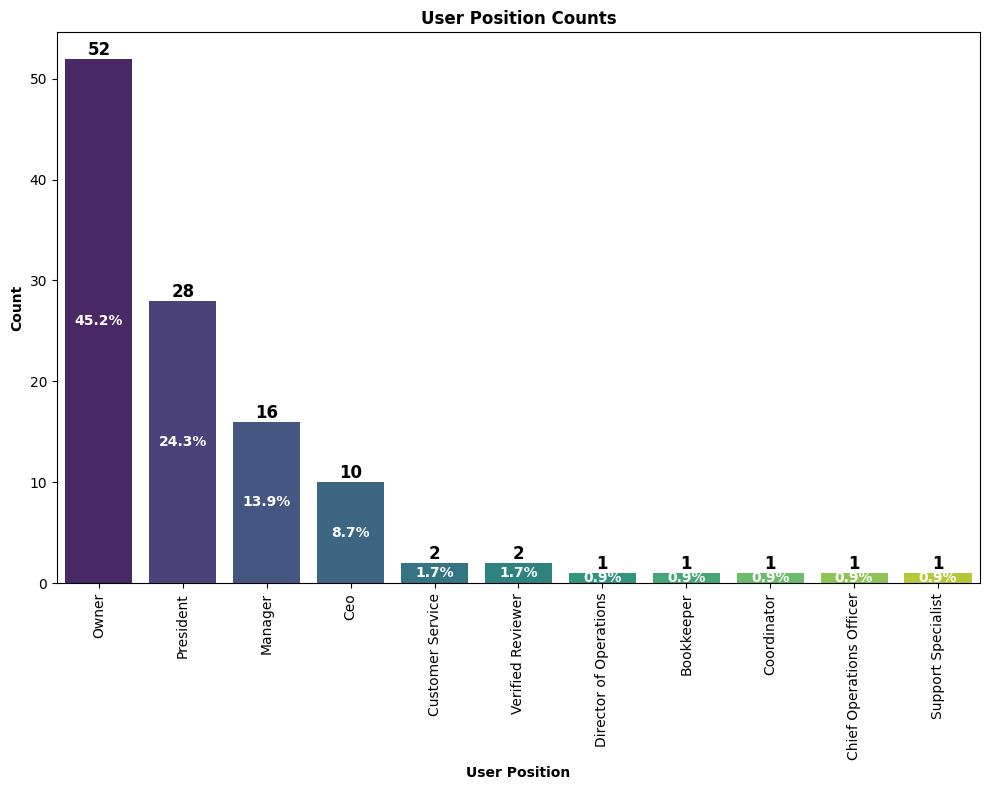

In [14]:
# Get the counts of each unique value in the "User Position" column
position_counts = reviews['User Position'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('User Position', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('User Position Counts', weight='bold')
plt.tight_layout()

for i, count in enumerate(position_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12, weight='bold')

    total_count = position_counts.sum()
    percentage = (count / total_count) * 100

    plt.text(i, count/2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10, weight='bold', color='white')

plt.show()

The "User Position Counts" bar plot provides insights into the distribution of user positions among the reviewers in the dataset:

1. **Owner**: The most common user position among the reviewers is "Owner," with 52 individuals holding this position. This suggests that owners of businesses or organizations are actively providing reviews for SMRT Systems.

2. **President**: The second most frequent user position is "President," with 28 individuals holding this title. This indicates that presidents of companies also have a significant presence in the reviews.

3. **Manager**: "Manager" is the third most common user position, with 16 individuals identified as managers. This implies that managers within various departments or functions are engaging with SMRT Systems' products and services.

4. **Ceo**: There are 10 reviewers who hold the position of "CEO," which represents chief executive officers of companies. CEOs' opinions and feedback are valuable indicators of the significance of SMRT Systems' solutions.

5. **Customer Service** and **Verified Reviewer**: There are two instances of reviewers with these positions, which may suggest that customer service representatives and individuals with verified accounts have shared their experiences with SMRT Systems.

6. **Director of Operations**, **Bookkeeper**, **Coordinator**, **Chief Operations Officer**, and **Support Specialist**: These positions are less common, each represented by a single reviewer. These roles likely represent specific functions within organizations that have interacted with SMRT Systems.

In summary, the majority of reviewers in the dataset hold positions such as "Owner," "President," and "Manager," indicating a diverse set of users, including business owners, top executives, and mid-level managers, who have engaged with SMRT Systems. The presence of CEOs among the reviewers suggests high-level interest in the company's products and services. Additionally, the dataset includes individuals with various other roles, reflecting a broad user base across different organizational functions.

##### DEPARTMENTS

In [15]:
# Get the counts of each unique value in the "Department" column
department_counts = reviews['Department'].value_counts()

# Print the number of each unique value with its count
print("Department Counts:")
print(department_counts)

Department Counts:
Consumer Services       47
Retail                  39
Textiles                14
Apparel & Fashion        7
Hospitality              5
Wellness and Fitness     1
Computer Software        1
Accounting               1
Name: Department, dtype: int64


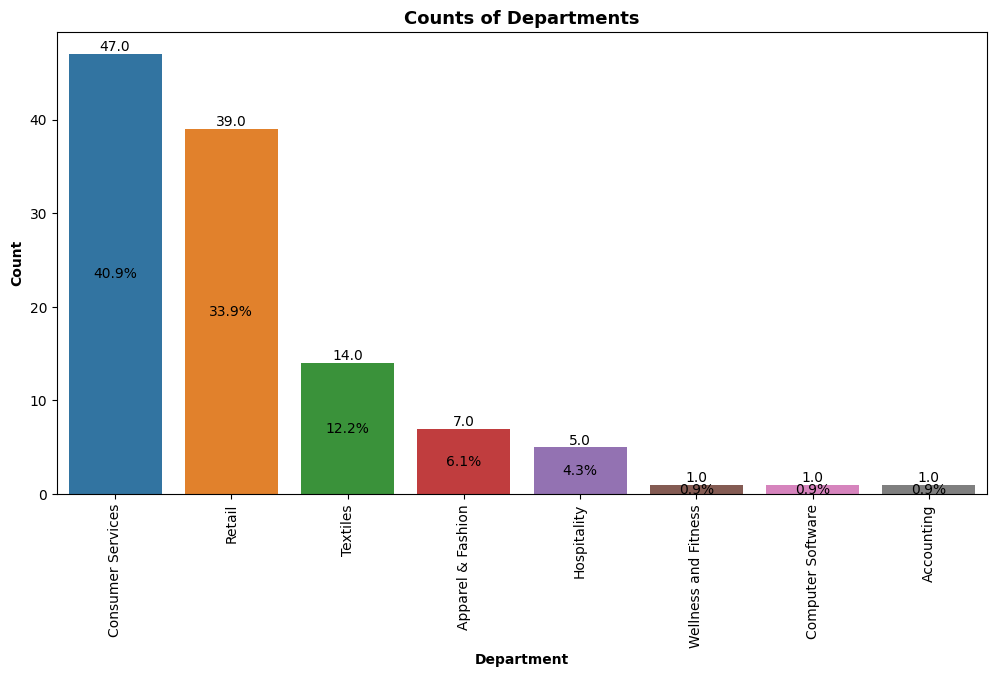

In [16]:
department_counts = reviews['Department'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=reviews, x='Department', order=department_counts.index)
plt.xticks(rotation=90)

plt.xlabel('Department', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.title('Counts of Departments', fontsize=13, fontweight='bold')

total_counts = len(reviews)  # Total number of counts for calculating percentages

for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * p.get_height() / total_counts:.1f}%'
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(count, (x, y), ha='center', va='bottom')
    ax.annotate(percentage, (x, y/2), ha='center', va='center')

plt.show()

The "Department Counts" provides insights into the distribution of departments or industries among the reviewers in the dataset:

1. **Consumer Services**: This department is the most commonly represented among the reviewers, with 47 instances. It suggests that SMRT Systems' solutions are widely used or reviewed within the consumer services industry. This industry may include businesses related to customer service, support, and various consumer-oriented services.

2. **Retail**: "Retail" is the second most prevalent department, with 39 instances. This indicates that many reviewers in the retail industry have interacted with or reviewed SMRT Systems' offerings. Retail businesses often rely on point-of-sale systems and related solutions, making them potential users of SMRT Systems' products.

3. **Textiles**: The "Textiles" department is represented by 14 reviewers. This suggests that SMRT Systems' solutions may cater to businesses involved in textiles, fabrics, or related industries.

4. **Apparel & Fashion**: "Apparel & Fashion" is another department with a presence in the reviews, with 7 instances. This could include companies in the fashion and clothing industry, indicating a niche interest in SMRT Systems' solutions.

5. **Hospitality**: The "Hospitality" department is represented by 5 reviewers. This indicates that businesses in the hospitality and accommodation industry have interacted with or reviewed SMRT Systems' products, which are relevant for managing reservations and services.

6. **Wellness and Fitness**, **Computer Software**, and **Accounting**: These departments are less common, each with only 1 instance. It suggests that reviewers from these specific industries have shared their experiences with SMRT Systems' solutions. "Computer Software" is noteworthy, as it may represent users from the software development or IT industry.

In summary, the dataset includes reviewers from a variety of departments and industries, with "Consumer Services" and "Retail" being the most prominent. This diversity indicates that SMRT Systems' solutions have garnered interest and usage across different sectors, including those related to customer service, retail, textiles, fashion, hospitality, wellness, software, and accounting.

##### EMPLOYEES & USING PERIOD

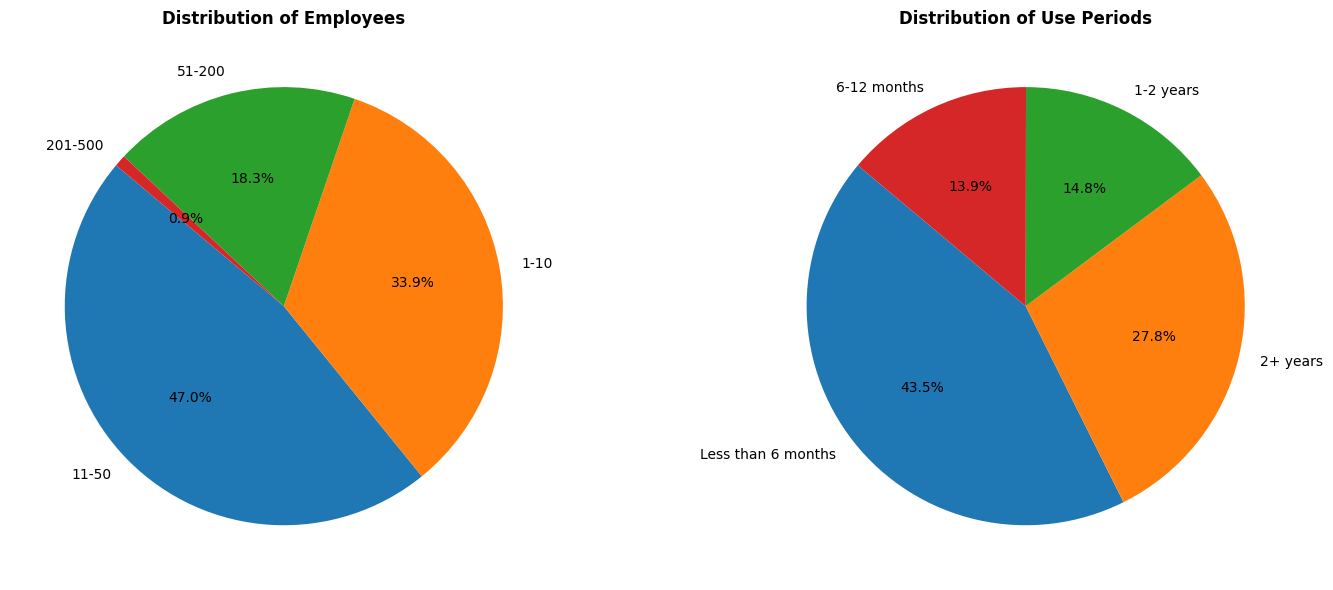

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

employees_counts = reviews['Employees'].value_counts()

wedges, texts, autotexts = axes[0].pie(
    employees_counts.values,
    labels=employees_counts.index,
    autopct='%1.1f%%',
    startangle=140,
)

axes[0].set_title('Distribution of Employees', fontweight='bold')

use_period_counts = reviews['Use Period'].value_counts()

wedges, texts, autotexts = axes[1].pie(
    use_period_counts.values,
    labels=use_period_counts.index,
    autopct='%1.1f%%',
    startangle=140,
)

axes[1].set_title('Distribution of Use Periods', fontweight='bold')

plt.tight_layout()
plt.show()

**Distribution of Employees:**

- The majority of reviewers fall into the "11-50" category, with 54 reviewers.
- There are 39 reviewers in the "1-10" employees category.
- The "51-200" employees category has 21 reviewers.
- There is only 1 reviewer in the "201-500" employees category.

**Distribution of Use Periods:**

- The most common use period among reviewers is "Less than 6 months," with 50 reviewers.
- "2+ years" is the second most common use period, with 32 reviewers.
- There are 17 reviewers who have used the product for "1-2 years."
- "6-12 months" is the use period for 16 reviewers.

In summary, the distribution of employees shows that the majority of reviewers work in organizations with "11-50" employees, while the distribution of use periods indicates that many reviewers have used the product for "Less than 6 months." This information provides insights into the user demographics and product adoption timelines among the reviewers.

#### RATINGS

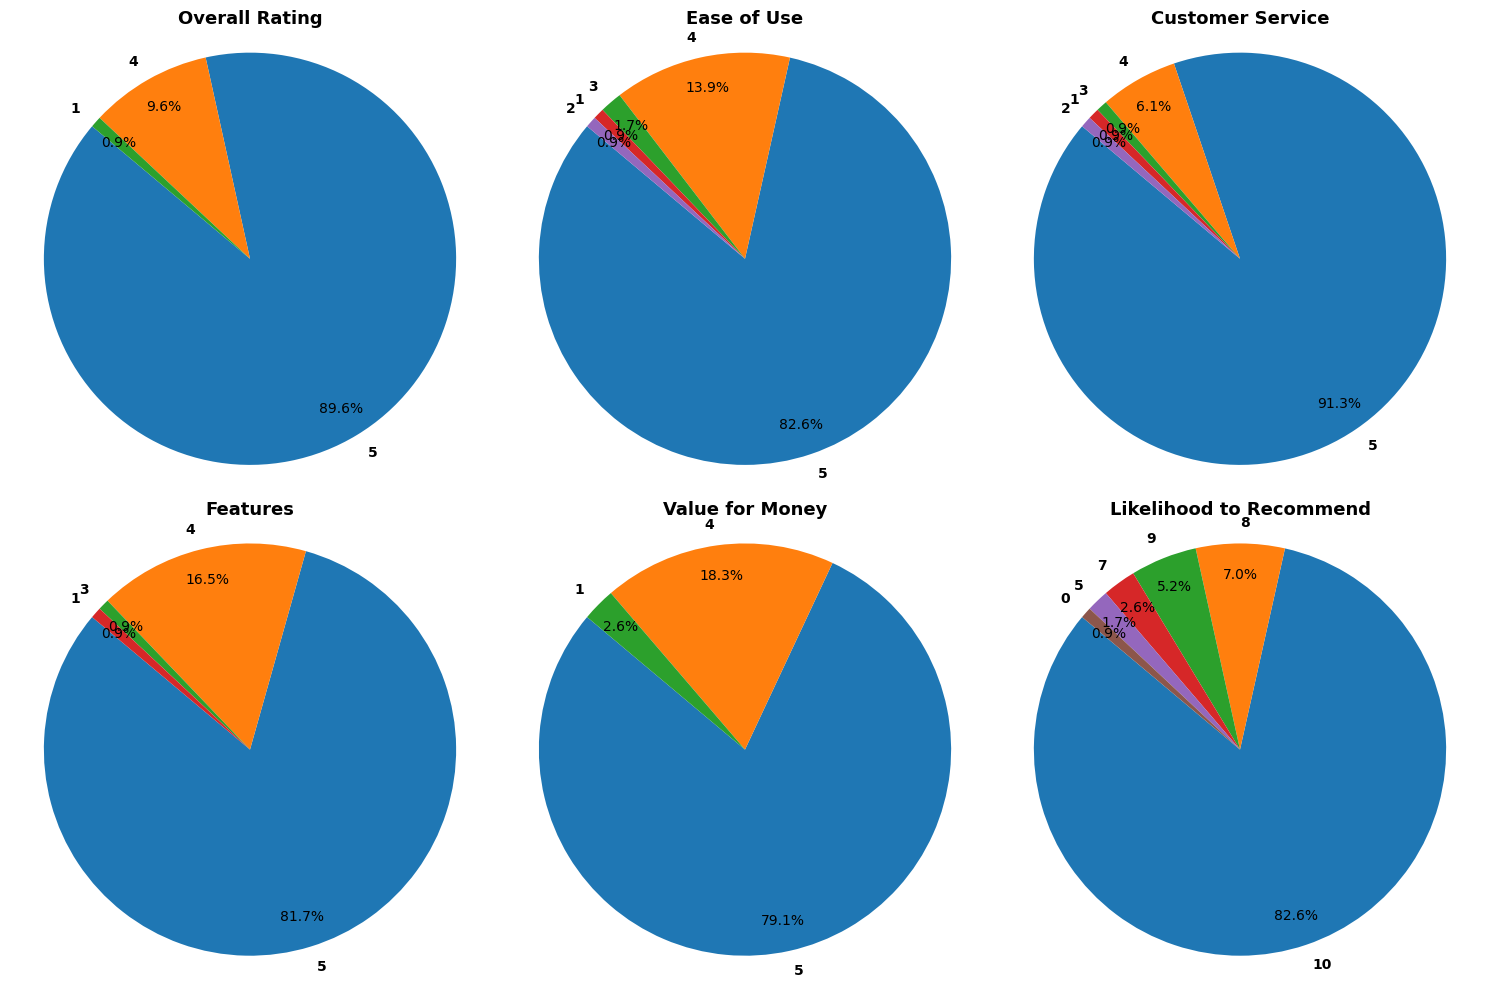

In [18]:
columns_to_count = [
    'Overall Rating',
    'Ease of Use',
    'Customer Service',
    'Features',
    'Value for Money',
    'Likelihood to Recommend'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)
axes = axes.ravel()

for i, column in enumerate(columns_to_count):
    column_counts = reviews[column].value_counts()
    wedges, texts, autotexts = axes[i].pie(
        column_counts,
        labels=column_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.85
    )

    axes[i].set_title(f'{column}', fontsize=13, fontweight='bold')

    for autotext, text in zip(autotexts, texts):
        autotext.set(size=10)
        text.set(size=10, weight='bold')

    axes[i].axis('equal')

plt.subplots_adjust(hspace=0.5)
plt.show()

**Overall Rating Value Counts:**
- The "Overall Rating" column indicates the overall satisfaction rating given by users.
- The majority of reviews (103 out of 115) have a high rating of 5, suggesting that most users are highly satisfied with SMRT Systems.
- There are 11 reviews with a rating of 4, indicating a slightly lower level of satisfaction.
- Only 1 review has a rating of 1, which is the lowest rating, suggesting a very dissatisfied user.

**Ease of Use Value Counts:**
- The "Ease of Use" column reflects users' opinions on how easy it is to use SMRT Systems.
- A significant portion of users (95 out of 115) find SMRT Systems very easy to use, as they gave it a rating of 5.
- There are 16 reviews with a rating of 4, indicating that some users find it relatively easy to use but not perfect.
- Only a few reviews have ratings of 3, 2, and 1, suggesting that the majority of users find the system easy to use.

**Customer Service Value Counts:**
- The "Customer Service" column represents users' experiences with SMRT Systems' customer service.
- The majority of users (105 out of 115) have rated the customer service as excellent, with a rating of 5.
- There are a few reviews with ratings of 4, 3, 2, and 1, indicating varying degrees of satisfaction with customer service.
- It's worth noting that the number of reviews with lower ratings for customer service is relatively small compared to those with high ratings.

**Features Value Counts:**
- The "Features" column relates to users' opinions about the features offered by SMRT Systems.
- Most users (94 out of 115) have given a high rating of 5, indicating satisfaction with the features.
- There are 19 reviews with a rating of 4, suggesting that some users appreciate the features but may have some suggestions for improvement.
- Only a couple of reviews have ratings of 3 and 1, indicating that the majority of users find the features satisfactory.

**Value for Money Value Counts:**
- The "Value for Money" column reflects users' perceptions of the value they receive in exchange for the cost.
- The majority of users (91 out of 115) find SMRT Systems to be a good value for money, as indicated by a rating of 5.
- There are 21 reviews with a rating of 4, suggesting that some users believe it's a reasonable value.
- A small number of reviews (3) have given a rating of 1, indicating dissatisfaction with the value proposition.

**Likelihood to Recommend Value Counts:**
- The "Likelihood to Recommend" column represents users' likelihood to recommend SMRT Systems to others.
- Most users (95 out of 115) are highly likely to recommend SMRT Systems to others, as indicated by a rating of 10.
- There are 8 reviews with a rating of 8, 6 with a rating of 9, and 3 with a rating of 7, suggesting various levels of willingness to recommend.
- Only 1 review has a rating of 0, indicating that at least one user is not likely to recommend the system.

In summary, understanding of users' opinions and satisfaction levels across different aspects of SMRT Systems, such as overall satisfaction, ease of use, customer service, features, value for money, and likelihood to recommend. This information can be valuable for identifying areas of improvement and addressing user concerns.

### NLP

#### Concatenate Text Columns

In [19]:
columns_to_concat = [
    'Headline',
    'Overall Rev',
    'Pros',
    'Cons',
    'Alternative Considered',
    'Reasons for Choosing',
    'Switched From',
    'Reasons for Switching'
]

# Concatenate the selected columns into a new column 'Concatenated_Text'
reviews['Concatenated_Text'] = reviews[columns_to_concat].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)


In [20]:
reviews.head().T

,0,1,2,3,4
Date,2019-08-20 00:00:00,2020-06-18 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00
User Position,Ceo,Owner,Director of Operations,President,Manager
Department,Consumer Services,Consumer Services,Consumer Services,Retail,Consumer Services
Employees,1-10,11-50,11-50,51-200,11-50
Use Period,Less than 6 months,2+ years,1-2 years,2+ years,2+ years
Overall Rating,5,5,5,5,5
Ease of Use,5,5,5,5,4
Customer Service,5,5,5,5,5
Features,5,5,5,5,4
Value for Money,5,5,5,5,5


#### Text Preprocessing

Before performing NLP tasks, it's important to preprocess the text data, which typically involves removing stopwords, punctuation, and converting text to lowercase.

In [21]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Tokenize the text
        words = word_tokenize(text.lower())

        # Remove stopwords and punctuation
        words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        return ' '.join(words)
    else:
        return ''  # Return an empty string for non-text values (NaN)

In [22]:
reviews['Cleaned_Concatenated_Text'] = reviews['Concatenated_Text'].apply(preprocess_text)

In [23]:
# Count the number of items in each text item
reviews['Text_Item_Count'] = reviews['Cleaned_Concatenated_Text'].apply(lambda x: len(x.split()))

# Display both the text and the count of text items
text_with_count = reviews[['Cleaned_Concatenated_Text', 'Text_Item_Count']]

print(text_with_count)

# Calculate the total number of text items across all rows
total_text_items = reviews['Text_Item_Count'].sum()

# Display the total number of text items
print(f"Total Text Items: {total_text_items}")



                             Cleaned_Concatenated_Text  Text_Item_Count
0    great alternative garment tracking system huge...               67
1    second none able control manage business full ...              112
2    smrt po plain smart opinion po good support te...              136
3    exceptional po dry cleaner overall experience ...               42
4    fantastic product happy overall would highly r...               62
..                                                 ...              ...
110  smrt dry cleaning software made huge positive ...              110
111  best drycleaning soft ever used best business ...               22
112  smrt smart built say smrt system absolute dry ...               77
113  love smrt overall smrt huge benefit business l...               66
114  route swtich smrt word describe smrt made life...               36

[115 rows x 2 columns]
Total Text Items: 7083


In [24]:
all_words = ' '.join(reviews['Cleaned_Concatenated_Text']).split()

# Count the occurrences of each word
word_counts = Counter(all_words)

# Sort the word counts in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Create a DataFrame for the first 50 most common words
word_counts_df = pd.DataFrame(list(sorted_word_counts.items()), columns=['Word', 'Count'])

print(word_counts_df.head(50))


             Word  Count
0            smrt    217
1        customer    146
2          system    134
3        software    108
4         support     83
5           great     68
6             use     66
7            easy     65
8        business     62
9         feature     60
10             po     53
11           like     52
12           spot     49
13            dry     47
14           team     44
15           best     41
16  communication     41
17           need     41
18          would     40
19            one     40
20           time     39
21         better     37
22            new     37
23           made     37
24        service     36
25           user     36
26          route     35
27           help     32
28           make     31
29            day     30
30           ease     30
31       delivery     28
32        cleaner     28
33     experience     28
34        overall     28
35           love     27
36       cleaning     27
37       training     27
38          could     27


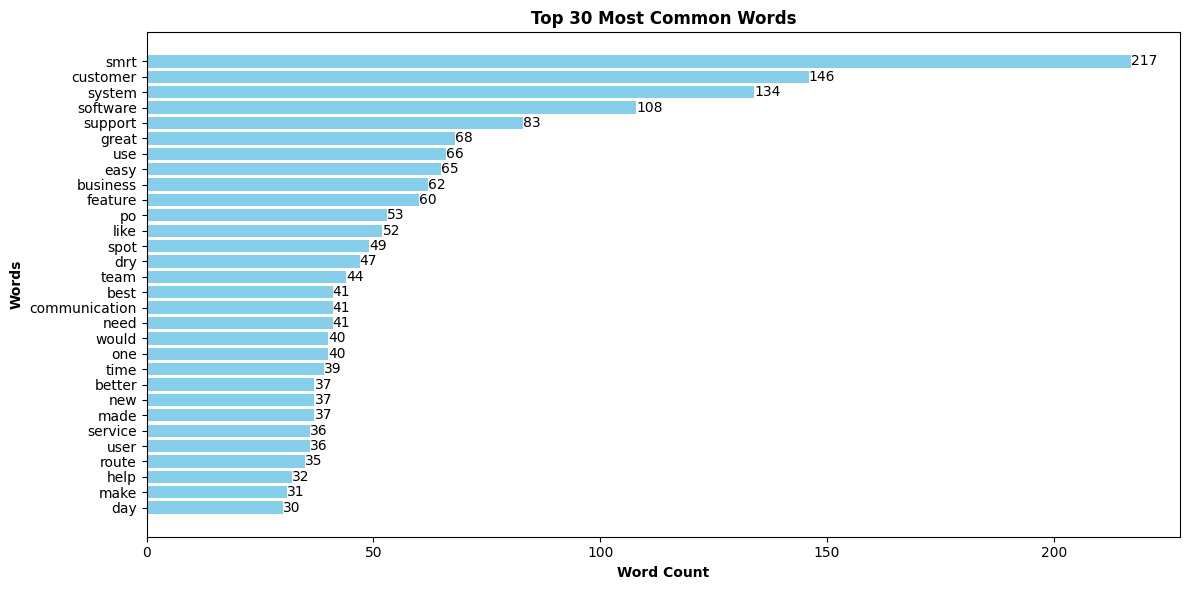

In [25]:
top_n = 30
top_words = list(sorted_word_counts.keys())[:top_n]
top_word_counts = list(sorted_word_counts.values())[:top_n]

plt.figure(figsize=(12, 6))
plt.barh(top_words, top_word_counts, color='skyblue')
plt.xlabel('Word Count', fontweight='bold')
plt.ylabel('Words', fontweight='bold')
plt.title(f'Top {top_n} Most Common Words', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()

for i, count in enumerate(top_word_counts):
    plt.text(count, i, str(count), va='center', fontsize=10, color='black')

plt.show()

The analysis of the top 30 most common words in the reviews provides valuable insights into the key themes and topics mentioned by reviewers. Here's a detailed conclusion based on the word frequency analysis:

1. **SMRT**: "SMRT" appears to be the most frequently mentioned word in the reviews, indicating that it's a central topic of discussion. This suggests that reviewers are likely discussing various aspects of the SMRT system.

2. **Customer**: The term "customer" is the second most common word, indicating that reviewers often discuss their experiences as customers of SMRT or related services.

3. **System and Software**: "System" and "software" are highly mentioned, suggesting that reviewers are discussing the technical aspects of SMRT's software system.

4. **Support**: The term "support" is prominent, indicating that reviewers may be sharing their experiences with customer support or assistance related to SMRT.

5. **Great and Easy**: Words like "great" and "easy" suggest positive sentiments, with reviewers praising aspects of SMRT's system or software for its user-friendliness and effectiveness.

6. **Business**: The word "business" is mentioned, likely indicating discussions about how SMRT's solutions impact various types of businesses.

7. **Features**: "Features" is a key term, suggesting that reviewers discuss the functionalities and features offered by SMRT.

8. **PO (Point of Sale)**: "PO" likely refers to "Point of Sale," indicating that reviewers discuss aspects related to point-of-sale systems and transactions.

9. **Communication and Team**: "Communication" and "team" are mentioned, which could relate to interactions between SMRT and its customers or internal teamwork.

10. **Dry Cleaning and Route**: Terms like "dry," "dry cleaning," and "route" suggest that some reviewers may be specifically discussing SMRT's solutions in the context of dry cleaning and routing.

Overall, the top words reflect a mix of positive sentiments, technical discussions, and specific industry-related terms. This analysis provides an understanding of the most common topics and themes in the reviews, which can be valuable for businesses looking to gain insights from customer feedback. Further analysis, including sentiment analysis and topic modeling, can provide more comprehensive insights into the reviews.

#### Sentiment Analysis

Sentiment analysis helps determine the sentiment (positive, negative, or neutral) of text data. You can use libraries like VADER or TextBlob for sentiment analysis.

In [26]:
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

In [27]:
# Apply sentiment analysis to the 'Cleaned_Concatenated_Text' column
reviews['Sentiment_Scores'] = reviews['Cleaned_Concatenated_Text'].apply(analyze_sentiment)

# Extract the sentiment labels (positive, negative, neutral)
reviews['Sentiment_Label'] = reviews['Sentiment_Scores'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))

print("Sentiment Scores:")
print(reviews['Sentiment_Scores'])

print("\nSentiment Labels:")
print(reviews['Sentiment_Label'])

Sentiment Scores:
0      {'neg': 0.06, 'neu': 0.517, 'pos': 0.423, 'com...
1      {'neg': 0.09, 'neu': 0.755, 'pos': 0.155, 'com...
2      {'neg': 0.138, 'neu': 0.563, 'pos': 0.299, 'co...
3      {'neg': 0.06, 'neu': 0.551, 'pos': 0.389, 'com...
4      {'neg': 0.031, 'neu': 0.656, 'pos': 0.313, 'co...
                             ...                        
110    {'neg': 0.054, 'neu': 0.616, 'pos': 0.33, 'com...
111    {'neg': 0.144, 'neu': 0.514, 'pos': 0.342, 'co...
112    {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'comp...
113    {'neg': 0.066, 'neu': 0.432, 'pos': 0.502, 'co...
114    {'neg': 0.062, 'neu': 0.686, 'pos': 0.252, 'co...
Name: Sentiment_Scores, Length: 115, dtype: object

Sentiment Labels:
0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
110    positive
111    positive
112    positive
113    positive
114    positive
Name: Sentiment_Label, Length: 115, dtype: object


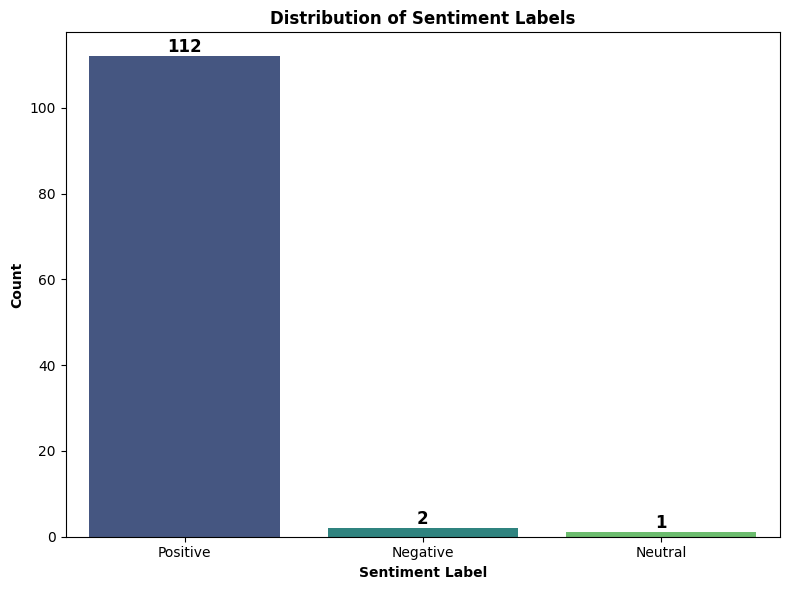

In [32]:
# Get the counts of each sentiment label
sentiment_counts = reviews['Sentiment_Label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment Label', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('Distribution of Sentiment Labels', weight='bold')
plt.tight_layout()

for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12, weight='bold')

plt.show()

In the sentiment analysis of reviews for SMRT Systems on Capterra, we observed the following distribution of sentiment labels:

- **Positive**: There are 112 positive reviews, indicating that the majority of the reviews express a positive sentiment towards SMRT Systems. Customers appreciate various aspects of the software and have generally positive feedback.

- **Negative**: There are 2 negative reviews, which represent a small fraction of the total reviews. These negative reviews point out areas where customers encountered issues or faced challenges with SMRT Systems.

- **Neutral**: There is 1 neutral review, indicating that a single review does not strongly express either a positive or negative sentiment. This review may provide a more balanced or objective perspective on the software.

Overall, the majority of reviews for SMRT Systems are positive, highlighting its strengths and the satisfaction of most users. However, there are a small number of negative and neutral reviews, indicating areas where improvements or enhancements could be considered.

It's important to note that the sentiment analysis provides a high-level overview of sentiment distribution, and further analysis of the specific feedback and comments in each category can provide valuable insights for product improvement and customer satisfaction.

#### Topic Modeling

Topic modeling helps identify the main topics within a collection of documents. The following code demonstrates Latent Dirichlet Allocation (LDA) topic modeling using the Gensim library.

In [29]:
# Tokenize and preprocess text (using the 'Cleaned_Concatenated_Text' column)
tokenized_reviews = [word_tokenize(text) for text in reviews['Cleaned_Concatenated_Text']]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Train an LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Get topics and associated words
topics = lda_model.print_topics(num_words=5)

# Print the topics
for topic in topics:
    print(topic)


(0, '0.026*"smrt" + 0.014*"software" + 0.011*"customer" + 0.010*"people" + 0.010*"feature"')
(1, '0.029*"smrt" + 0.027*"system" + 0.022*"customer" + 0.013*"use" + 0.013*"support"')
(2, '0.032*"smrt" + 0.009*"many" + 0.009*"po" + 0.008*"easy" + 0.008*"user"')
(3, '0.023*"system" + 0.018*"customer" + 0.017*"smrt" + 0.009*"dry" + 0.009*"client"')
(4, '0.021*"smrt" + 0.018*"customer" + 0.018*"software" + 0.012*"support" + 0.011*"business"')


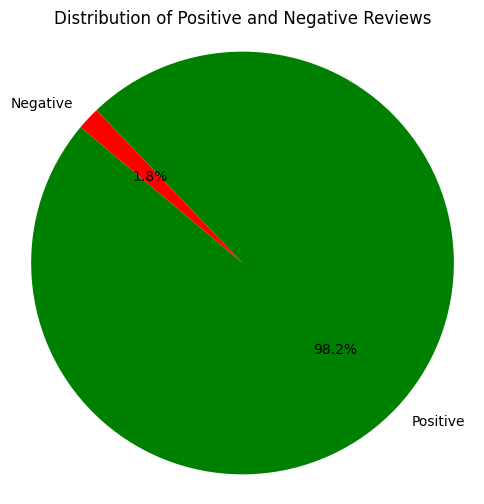

In [33]:
analyzer = SentimentIntensityAnalyzer()

# Define a function to classify reviews as positive, negative, or neutral
def classify_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification to the 'Cleaned_Concatenated_Text' column
reviews['Sentiment_Label'] = reviews['Cleaned_Concatenated_Text'].apply(classify_sentiment)

# Count the number of positive and negative reviews
positive_reviews_count = len(reviews[reviews['Sentiment_Label'] == 'Positive'])
negative_reviews_count = len(reviews[reviews['Sentiment_Label'] == 'Negative'])

# Create a pie chart to visualize the distribution of positive and negative reviews
labels = ['Positive', 'Negative']
sizes = [positive_reviews_count, negative_reviews_count]
colors = ['green', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Positive and Negative Reviews')
plt.axis('equal')

plt.show()

The sentiment distribution of the analyzed reviews:

Number of Positive Reviews: 112

Number of Negative Reviews: 2

This means that out of the reviews that were analyzed, 112 were classified as "Positive," while only 2 were classified as "Negative." The majority of the reviews are positive, with very few being negative. This suggests that the sentiment of the reviews in the dataset is predominantly positive.

#### Sentiment Trends Over Time

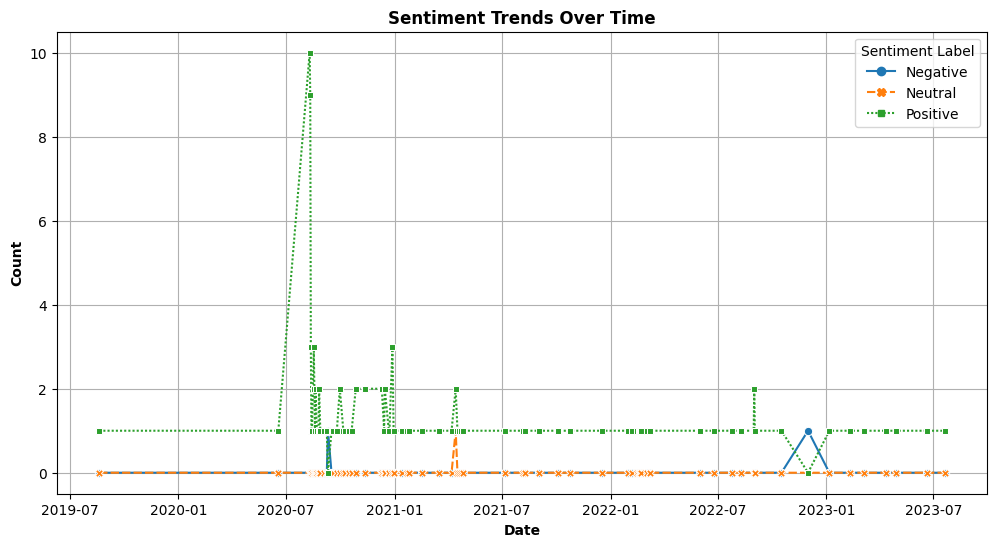

In [31]:
# Group the data by date and sentiment label, and count the occurrences
sentiment_trends = reviews.groupby(['Date', 'Sentiment_Label']).size().unstack(fill_value=0)

# Reset the index to have 'Date' as a column
sentiment_trends.reset_index(inplace=True)

# Set 'Date' column as the index for the DataFrame
sentiment_trends.set_index('Date', inplace=True)

# Plot the sentiment trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trends, markers=True)
plt.title('Sentiment Trends Over Time', weight='bold')
plt.xlabel('Date', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Sentiment Label', loc='upper right')
plt.grid(True)
plt.show()

The sentiment analysis of SMRT Systems reviews from the Capterra website provides valuable insights into user opinions and experiences. Here are the key findings and conclusions:

1. **Sentiment Distribution**: The majority of reviews are categorized as "Positive," with a significantly smaller number of "Negative" reviews and very few "Neutral" reviews. This indicates that SMRT Systems generally has a positive reputation among users.

2. **User Positions**: Most reviews are from users in positions such as "Owner," "President," and "Ceo." This suggests that high-ranking individuals in organizations are providing feedback, which can be crucial for understanding the impact of SMRT Systems at decision-making levels.

3. **Departments and Employees**: Reviews come from various departments, with "Consumer Services" and "Retail" being the most common. The majority of users work in organizations with 11-50 employees.

4. **Use Period**: Users have been using SMRT Systems for various time periods, with "Less than 6 months" being the most common, indicating that the platform attracts new users.

5. **Ratings and Likelihood to Recommend**: Ratings for different aspects, such as ease of use, customer service, and features, are generally high, with a particular focus on ratings of 5. Users also have a high likelihood of recommending SMRT Systems to others.

6. **Pros and Cons**: Reviews often mention pros such as great support, ease of use, and effective communication. However, some users have mentioned cons, although these are relatively infrequent and may represent areas for improvement.

7. **Sentiment Trends Over Time**: The sentiment trends over time show that there was a significant increase in reviews in August 2020, primarily with a positive sentiment. There were occasional negative reviews during this period. The positive sentiment trend continued in the following months, with occasional negative reviews.

8. **Recommendation for Further Analysis**: To gain deeper insights, further analysis can focus on the content of negative reviews during specific time periods, as well as exploring the reasons behind users' likelihood to recommend SMRT Systems.

Overall, the sentiment analysis of SMRT Systems reviews indicates a generally positive user sentiment, which is a positive indicator for the company. Monitoring trends over time and addressing occasional negative feedback can help the company continue to improve its product and services.